In [1]:
seed=1899

In [2]:
import warnings
# warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['PYTHONHASHSEED']=str(seed)

In [3]:
def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [4]:
import random
import tensorflow as tf


tf.random.set_seed(seed)

from keras.models import Sequential, load_model, save_model
from keras.layers import Dense,Input
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, Embedding, multiply
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras import backend as K
import glob
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error  
import keras
from datetime import datetime
from keras.callbacks import EarlyStopping
import time
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
# from sklearn.metrics import r2_score
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
np.random.seed(seed)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
from keras.utils import to_categorical
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import pacf
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=15,5

import numpy as np
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
from sklearn.cluster import KMeans
#PCA
from sklearn.manifold import TSNE

In [5]:
df = pd.read_csv('data.csv', header=0, index_col=None)

In [6]:
df

,Temp,RhPer,Thickness,SoilType,Sand,Silt,Clay,LL,PL,SL,...,Womc,Gamadmax,Phi,AEV,Wr,Mineral1,Mineral2,Mineral3,Er,Er_Paper
0,30,40,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,503,793.110224
1,30,50,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,471,717.338338
2,30,60,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,452,660.834156
3,30,70,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,416,616.547337
4,30,80,14,1,0,46,54,54,27,17,...,27.9,1.40,2042,209,1.2,3,1,0,324,580.590667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,50,50,4,5,20,27,53,69,28,6,...,18.4,1.73,1571,37,6.1,2,4,1,934,703.219730
356,50,60,4,5,20,27,53,69,28,6,...,18.4,1.73,1571,37,6.1,2,4,1,867,639.612289
357,50,70,4,5,20,27,53,69,28,6,...,18.4,1.73,1571,37,6.1,2,4,1,758,590.343069
358,50,80,4,5,20,27,53,69,28,6,...,18.4,1.73,1571,37,6.1,2,4,1,733,550.742582


In [7]:
idx=['Temp', 'RhPer', 'Gamadmax', 'Thickness', 'Phi', 'G', 'SoilType', 'Womc', 'Mineral1', 'Mineral2', 'Er','Er_Paper']


In [8]:
idx=['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral2', 'Mineral1', 'Mineral3', 'Gamadmax', 'SL', 'Er','Er_Paper']

In [9]:
newdf=df[idx]
data=newdf.values[:,:-2]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
label=newdf.values[:,-2]
np.random.seed(seed)
Per=np.random.permutation(len(data))
data=data[Per]
label=label[Per]


In [10]:
data.shape

(360, 10)

In [11]:
data[0]

array([0.  , 0.4 , 0.  , 0.  , 0.25, 0.  , 0.75, 0.  , 0.  , 1.  ])

In [12]:
label[:5]

array([304., 799., 319., 686., 377.])

[0]
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.05 µs


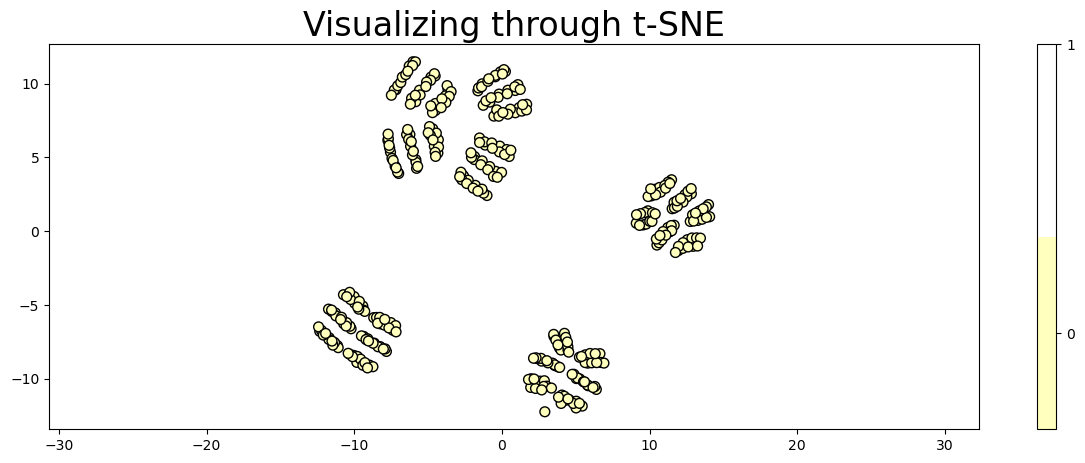

In [13]:
x_subset = data[:]
y_subset = [np.argmax(x) for x in label]

print(np.unique(y_subset))
x_subset=x_subset.reshape((x_subset.shape[0],x_subset.shape[1]))
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 50, c=y_subset, cmap='Spectral',edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(2)-0.5).set_ticks(np.arange(2))
plt.title('Visualizing through t-SNE', fontsize=24);

In [14]:
kmeans = KMeans(5)
kmeans.fit(data)
identified_clusters = kmeans.fit_predict(data)
# identified_clusters

In [15]:
count=[i for i in range(5)]
Train,Test=[],[]
TrainLabel, TestLabel=[],[]
for i in range(len(data)):
    x=identified_clusters[i]
    if x==0 and count[0] < 16:
        count[0]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==1 and count[1] < 16:
        count[1]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==2 and count[2] < 16:
        count[2]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==3 and count[3] < 17:
        count[3]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==4 and count[4] < 17:
        count[4]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    else:
        Train.append(data[i])
        TrainLabel.append(label[i])
        
Train=np.array(Train)
Test=np.array(Test)
TrainLabel=np.array(TrainLabel)
TestLabel=np.array(TestLabel)        

In [16]:
def MAPE(Y_actual,Y_Predicted):
    summ=0
    for i in range(len(Y_actual)):
        if Y_actual[i]!=0:
            summ+=np.abs((Y_actual[i] - Y_Predicted[i])/Y_actual[i])*100
        else:
            summ+=np.abs((Y_actual[i] - Y_Predicted[i]))*100
            
    mape = summ/len(Y_actual)
    return mape

def score(actual,predicted):
    mape=MAPE(actual,predicted)
    mse=mean_squared_error(actual,predicted)    
    rmse=math.sqrt(mse) 
    r2=r2_score(actual,predicted)
    return mse, rmse, mape[0],r2

In [17]:
top=10

In [31]:
reset_random_seeds(seed)

input_lyr = Input(shape=(top,))
initializer = tf.keras.initializers.HeNormal()
layer1 = Dense(100, activation='relu',kernel_initializer=initializer)(input_lyr)
layer2 = Dense(3000, activation='relu',kernel_initializer=initializer)(layer1)
# layer3 = Dense(5000, activation='relu',kernel_initializer=initializer)(layer2)
# d11=Dropout(0.01)(layer3)
output_layer = Dense(1)(layer2)
model = Model(input_lyr, output_layer)

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_10 (Dense)             (None, 3000)              303000    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3001      
Total params: 307,101
Trainable params: 307,101
Non-trainable params: 0
_________________________________________________________________


In [35]:
reset_random_seeds(seed)

callback=keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1.0e-4, patience=100, verbose=0, mode="auto", baseline=None, restore_best_weights=True)
history = model.fit(Train, TrainLabel, epochs=50000, batch_size=512,  validation_data=(Test, TestLabel), callbacks=[callback], shuffle=True)


Epoch 1/50000
1/1 [==============================] - 0s 97ms/step - loss: 55179.0312 - val_loss: 46848.0234
Epoch 2/50000
1/1 [==============================] - 0s 25ms/step - loss: 54629.9219 - val_loss: 46363.7812
Epoch 3/50000
1/1 [==============================] - 0s 25ms/step - loss: 54083.2188 - val_loss: 45883.3008
Epoch 4/50000
1/1 [==============================] - 0s 25ms/step - loss: 53540.4609 - val_loss: 45408.1445
Epoch 5/50000
1/1 [==============================] - 0s 26ms/step - loss: 53002.3906 - val_loss: 44938.1523
Epoch 6/50000
1/1 [==============================] - 0s 27ms/step - loss: 52470.0469 - val_loss: 44472.8945
Epoch 7/50000
1/1 [==============================] - 0s 26ms/step - loss: 51943.3906 - val_loss: 44012.0703
Epoch 8/50000
1/1 [==============================] - 0s 26ms/step - loss: 51422.4727 - val_loss: 43554.2969
Epoch 9/50000
1/1 [==============================] - 0s 26ms/step - loss: 50906.4570 - val_loss: 43100.7500
Epoch 10/50000
1/1 [========

1/1 [==============================] - 0s 24ms/step - loss: 22363.0547 - val_loss: 18466.8613
Epoch 77/50000
1/1 [==============================] - 0s 25ms/step - loss: 22017.8828 - val_loss: 18183.9219
Epoch 78/50000
1/1 [==============================] - 0s 25ms/step - loss: 21675.3633 - val_loss: 17903.9141
Epoch 79/50000
1/1 [==============================] - 0s 24ms/step - loss: 21336.0352 - val_loss: 17625.3262
Epoch 80/50000
1/1 [==============================] - 0s 24ms/step - loss: 20999.8770 - val_loss: 17347.5547
Epoch 81/50000
1/1 [==============================] - 0s 25ms/step - loss: 20666.5273 - val_loss: 17072.4004
Epoch 82/50000
1/1 [==============================] - 0s 25ms/step - loss: 20336.7383 - val_loss: 16799.9688
Epoch 83/50000
1/1 [==============================] - 0s 24ms/step - loss: 20010.2188 - val_loss: 16530.8672
Epoch 84/50000
1/1 [==============================] - 0s 25ms/step - loss: 19686.3047 - val_loss: 16264.5801
Epoch 85/50000
1/1 [==============

1/1 [==============================] - 0s 24ms/step - loss: 6273.1509 - val_loss: 5835.0527
Epoch 152/50000
1/1 [==============================] - 0s 24ms/step - loss: 6195.6270 - val_loss: 5783.8975
Epoch 153/50000
1/1 [==============================] - 0s 24ms/step - loss: 6120.8569 - val_loss: 5734.5918
Epoch 154/50000
1/1 [==============================] - 0s 25ms/step - loss: 6048.9473 - val_loss: 5687.3008
Epoch 155/50000
1/1 [==============================] - 0s 25ms/step - loss: 5979.7676 - val_loss: 5642.0298
Epoch 156/50000
1/1 [==============================] - 0s 25ms/step - loss: 5913.1328 - val_loss: 5598.7568
Epoch 157/50000
1/1 [==============================] - 0s 25ms/step - loss: 5848.9160 - val_loss: 5557.3511
Epoch 158/50000
1/1 [==============================] - 0s 25ms/step - loss: 5786.9004 - val_loss: 5517.7217
Epoch 159/50000
1/1 [==============================] - 0s 27ms/step - loss: 5727.2236 - val_loss: 5479.7422
Epoch 160/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 4201.9946 - val_loss: 4549.1162
Epoch 228/50000
1/1 [==============================] - 0s 25ms/step - loss: 4191.5410 - val_loss: 4538.8584
Epoch 229/50000
1/1 [==============================] - 0s 25ms/step - loss: 4181.2666 - val_loss: 4528.4980
Epoch 230/50000
1/1 [==============================] - 0s 27ms/step - loss: 4171.1895 - val_loss: 4518.0103
Epoch 231/50000
1/1 [==============================] - 0s 25ms/step - loss: 4161.1665 - val_loss: 4507.3291
Epoch 232/50000
1/1 [==============================] - 0s 25ms/step - loss: 4151.1719 - val_loss: 4496.3521
Epoch 233/50000
1/1 [==============================] - 0s 24ms/step - loss: 4141.2104 - val_loss: 4485.2910
Epoch 234/50000
1/1 [==============================] - 0s 24ms/step - loss: 4131.2559 - val_loss: 4474.2612
Epoch 235/50000
1/1 [==============================] - 0s 24ms/step - loss: 4121.3486 - val_loss: 4463.2373
Epoch 236/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 3519.7600 - val_loss: 3738.4246
Epoch 304/50000
1/1 [==============================] - 0s 26ms/step - loss: 3511.5225 - val_loss: 3728.1406
Epoch 305/50000
1/1 [==============================] - 0s 26ms/step - loss: 3503.3574 - val_loss: 3717.7607
Epoch 306/50000
1/1 [==============================] - 0s 25ms/step - loss: 3495.2432 - val_loss: 3707.2483
Epoch 307/50000
1/1 [==============================] - 0s 25ms/step - loss: 3487.1082 - val_loss: 3696.7471
Epoch 308/50000
1/1 [==============================] - 0s 25ms/step - loss: 3479.0063 - val_loss: 3686.2886
Epoch 309/50000
1/1 [==============================] - 0s 25ms/step - loss: 3470.9180 - val_loss: 3675.9609
Epoch 310/50000
1/1 [==============================] - 0s 25ms/step - loss: 3462.8538 - val_loss: 3665.8337
Epoch 311/50000
1/1 [==============================] - 0s 25ms/step - loss: 3454.7939 - val_loss: 3655.8699
Epoch 312/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 2939.5254 - val_loss: 3042.4749
Epoch 380/50000
1/1 [==============================] - 0s 26ms/step - loss: 2932.4597 - val_loss: 3034.4553
Epoch 381/50000
1/1 [==============================] - 0s 26ms/step - loss: 2925.4209 - val_loss: 3026.7734
Epoch 382/50000
1/1 [==============================] - 0s 25ms/step - loss: 2918.4177 - val_loss: 3019.0276
Epoch 383/50000
1/1 [==============================] - 0s 25ms/step - loss: 2911.4453 - val_loss: 3010.9910
Epoch 384/50000
1/1 [==============================] - 0s 24ms/step - loss: 2904.5227 - val_loss: 3002.8311
Epoch 385/50000
1/1 [==============================] - 0s 25ms/step - loss: 2897.6260 - val_loss: 2994.6672
Epoch 386/50000
1/1 [==============================] - 0s 27ms/step - loss: 2890.7354 - val_loss: 2986.5911
Epoch 387/50000
1/1 [==============================] - 0s 25ms/step - loss: 2883.8472 - val_loss: 2978.5732
Epoch 388/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 2455.1028 - val_loss: 2495.2144
Epoch 456/50000
1/1 [==============================] - 0s 26ms/step - loss: 2449.2856 - val_loss: 2489.2703
Epoch 457/50000
1/1 [==============================] - 0s 25ms/step - loss: 2443.5012 - val_loss: 2483.0789
Epoch 458/50000
1/1 [==============================] - 0s 24ms/step - loss: 2437.7571 - val_loss: 2476.8057
Epoch 459/50000
1/1 [==============================] - 0s 26ms/step - loss: 2432.0229 - val_loss: 2470.5867
Epoch 460/50000
1/1 [==============================] - 0s 26ms/step - loss: 2426.2839 - val_loss: 2464.7214
Epoch 461/50000
1/1 [==============================] - 0s 26ms/step - loss: 2420.5642 - val_loss: 2458.9131
Epoch 462/50000
1/1 [==============================] - 0s 26ms/step - loss: 2414.8604 - val_loss: 2452.9604
Epoch 463/50000
1/1 [==============================] - 0s 24ms/step - loss: 2409.1340 - val_loss: 2446.6665
Epoch 464/50000
1/1 [=======================

1/1 [==============================] - 0s 24ms/step - loss: 2066.2502 - val_loss: 2085.9136
Epoch 532/50000
1/1 [==============================] - 0s 26ms/step - loss: 2061.6873 - val_loss: 2080.9053
Epoch 533/50000
1/1 [==============================] - 0s 22ms/step - loss: 2057.1355 - val_loss: 2076.1572
Epoch 534/50000
1/1 [==============================] - 0s 25ms/step - loss: 2052.6101 - val_loss: 2071.7405
Epoch 535/50000
1/1 [==============================] - 0s 24ms/step - loss: 2048.1206 - val_loss: 2067.3745
Epoch 536/50000
1/1 [==============================] - 0s 25ms/step - loss: 2043.6411 - val_loss: 2062.9849
Epoch 537/50000
1/1 [==============================] - 0s 24ms/step - loss: 2039.1810 - val_loss: 2058.4910
Epoch 538/50000
1/1 [==============================] - 0s 25ms/step - loss: 2034.7534 - val_loss: 2054.0156
Epoch 539/50000
1/1 [==============================] - 0s 24ms/step - loss: 2030.3091 - val_loss: 2049.9341
Epoch 540/50000
1/1 [=======================

1/1 [==============================] - 0s 25ms/step - loss: 1759.2528 - val_loss: 1791.8719
Epoch 608/50000
1/1 [==============================] - 0s 25ms/step - loss: 1755.5370 - val_loss: 1788.6487
Epoch 609/50000
1/1 [==============================] - 0s 24ms/step - loss: 1751.8190 - val_loss: 1785.3719
Epoch 610/50000
1/1 [==============================] - 0s 26ms/step - loss: 1748.1031 - val_loss: 1781.9924
Epoch 611/50000
1/1 [==============================] - 0s 25ms/step - loss: 1744.3954 - val_loss: 1778.7256
Epoch 612/50000
1/1 [==============================] - 0s 24ms/step - loss: 1740.7068 - val_loss: 1775.4811
Epoch 613/50000
1/1 [==============================] - 0s 25ms/step - loss: 1737.0300 - val_loss: 1772.3967
Epoch 614/50000
1/1 [==============================] - 0s 25ms/step - loss: 1733.3706 - val_loss: 1769.1869
Epoch 615/50000
1/1 [==============================] - 0s 24ms/step - loss: 1729.7191 - val_loss: 1765.8524
Epoch 616/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 1508.6716 - val_loss: 1591.9171
Epoch 684/50000
1/1 [==============================] - 0s 25ms/step - loss: 1505.8499 - val_loss: 1589.5873
Epoch 685/50000
1/1 [==============================] - 0s 26ms/step - loss: 1503.0339 - val_loss: 1587.2056
Epoch 686/50000
1/1 [==============================] - 0s 26ms/step - loss: 1500.2428 - val_loss: 1585.1069
Epoch 687/50000
1/1 [==============================] - 0s 25ms/step - loss: 1497.4493 - val_loss: 1583.2720
Epoch 688/50000
1/1 [==============================] - 0s 25ms/step - loss: 1494.6637 - val_loss: 1581.5381
Epoch 689/50000
1/1 [==============================] - 0s 26ms/step - loss: 1491.8805 - val_loss: 1579.6426
Epoch 690/50000
1/1 [==============================] - 0s 24ms/step - loss: 1489.1089 - val_loss: 1577.5287
Epoch 691/50000
1/1 [==============================] - 0s 24ms/step - loss: 1486.3392 - val_loss: 1575.6434
Epoch 692/50000
1/1 [=======================

1/1 [==============================] - 0s 24ms/step - loss: 1314.7885 - val_loss: 1449.5553
Epoch 760/50000
1/1 [==============================] - 0s 26ms/step - loss: 1312.4188 - val_loss: 1447.9373
Epoch 761/50000
1/1 [==============================] - 0s 27ms/step - loss: 1310.0615 - val_loss: 1446.4816
Epoch 762/50000
1/1 [==============================] - 0s 25ms/step - loss: 1307.7041 - val_loss: 1444.8696
Epoch 763/50000
1/1 [==============================] - 0s 26ms/step - loss: 1305.3459 - val_loss: 1442.9729
Epoch 764/50000
1/1 [==============================] - 0s 24ms/step - loss: 1303.0005 - val_loss: 1441.2235
Epoch 765/50000
1/1 [==============================] - 0s 27ms/step - loss: 1300.6548 - val_loss: 1439.4048
Epoch 766/50000
1/1 [==============================] - 0s 25ms/step - loss: 1298.3124 - val_loss: 1437.4965
Epoch 767/50000
1/1 [==============================] - 0s 27ms/step - loss: 1295.9727 - val_loss: 1435.5114
Epoch 768/50000
1/1 [=======================

1/1 [==============================] - 0s 27ms/step - loss: 1143.4044 - val_loss: 1339.3484
Epoch 836/50000
1/1 [==============================] - 0s 25ms/step - loss: 1141.3281 - val_loss: 1337.5352
Epoch 837/50000
1/1 [==============================] - 0s 25ms/step - loss: 1139.2632 - val_loss: 1336.0571
Epoch 838/50000
1/1 [==============================] - 0s 25ms/step - loss: 1137.1982 - val_loss: 1335.0682
Epoch 839/50000
1/1 [==============================] - 0s 29ms/step - loss: 1135.1390 - val_loss: 1334.3750
Epoch 840/50000
1/1 [==============================] - 0s 25ms/step - loss: 1133.0673 - val_loss: 1333.1826
Epoch 841/50000
1/1 [==============================] - 0s 28ms/step - loss: 1131.0449 - val_loss: 1331.8998
Epoch 842/50000
1/1 [==============================] - 0s 30ms/step - loss: 1128.9900 - val_loss: 1330.8392
Epoch 843/50000
1/1 [==============================] - 0s 27ms/step - loss: 1126.9427 - val_loss: 1329.7056
Epoch 844/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 999.2416 - val_loss: 1251.4456
Epoch 912/50000
1/1 [==============================] - 0s 25ms/step - loss: 997.4528 - val_loss: 1250.0929
Epoch 913/50000
1/1 [==============================] - 0s 26ms/step - loss: 995.7027 - val_loss: 1248.9136
Epoch 914/50000
1/1 [==============================] - 0s 25ms/step - loss: 993.9387 - val_loss: 1247.7727
Epoch 915/50000
1/1 [==============================] - 0s 25ms/step - loss: 992.1539 - val_loss: 1246.0482
Epoch 916/50000
1/1 [==============================] - 0s 25ms/step - loss: 990.3828 - val_loss: 1244.2362
Epoch 917/50000
1/1 [==============================] - 0s 29ms/step - loss: 988.6019 - val_loss: 1242.5786
Epoch 918/50000
1/1 [==============================] - 0s 25ms/step - loss: 986.8403 - val_loss: 1241.4663
Epoch 919/50000
1/1 [==============================] - 0s 25ms/step - loss: 985.0724 - val_loss: 1240.2704
Epoch 920/50000
1/1 [==============================] 

1/1 [==============================] - 0s 26ms/step - loss: 869.7794 - val_loss: 1205.5815
Epoch 988/50000
1/1 [==============================] - 0s 26ms/step - loss: 868.2894 - val_loss: 1205.3257
Epoch 989/50000
1/1 [==============================] - 0s 25ms/step - loss: 866.8098 - val_loss: 1204.8423
Epoch 990/50000
1/1 [==============================] - 0s 25ms/step - loss: 865.3523 - val_loss: 1204.3560
Epoch 991/50000
1/1 [==============================] - 0s 25ms/step - loss: 863.8866 - val_loss: 1203.8948
Epoch 992/50000
1/1 [==============================] - 0s 26ms/step - loss: 862.4279 - val_loss: 1203.4132
Epoch 993/50000
1/1 [==============================] - 0s 26ms/step - loss: 860.9778 - val_loss: 1202.8184
Epoch 994/50000
1/1 [==============================] - 0s 25ms/step - loss: 859.5101 - val_loss: 1201.9713
Epoch 995/50000
1/1 [==============================] - 0s 24ms/step - loss: 858.0593 - val_loss: 1201.3378
Epoch 996/50000
1/1 [==============================] 

1/1 [==============================] - 0s 25ms/step - loss: 769.7318 - val_loss: 1155.9896
Epoch 1064/50000
1/1 [==============================] - 0s 28ms/step - loss: 768.5381 - val_loss: 1155.5927
Epoch 1065/50000
1/1 [==============================] - 0s 27ms/step - loss: 767.3379 - val_loss: 1154.9446
Epoch 1066/50000
1/1 [==============================] - 0s 26ms/step - loss: 766.1370 - val_loss: 1154.0070
Epoch 1067/50000
1/1 [==============================] - 0s 25ms/step - loss: 764.9238 - val_loss: 1153.1029
Epoch 1068/50000
1/1 [==============================] - 0s 26ms/step - loss: 763.7463 - val_loss: 1152.6816
Epoch 1069/50000
1/1 [==============================] - 0s 25ms/step - loss: 762.5636 - val_loss: 1152.2827
Epoch 1070/50000
1/1 [==============================] - 0s 26ms/step - loss: 761.3926 - val_loss: 1151.6829
Epoch 1071/50000
1/1 [==============================] - 0s 25ms/step - loss: 760.2189 - val_loss: 1150.7670
Epoch 1072/50000
1/1 [=======================

1/1 [==============================] - 0s 24ms/step - loss: 686.7330 - val_loss: 1113.2516
Epoch 1140/50000
1/1 [==============================] - 0s 28ms/step - loss: 685.7684 - val_loss: 1113.2511
Epoch 1141/50000
1/1 [==============================] - 0s 24ms/step - loss: 684.7747 - val_loss: 1113.0571
Epoch 1142/50000
1/1 [==============================] - 0s 29ms/step - loss: 683.7999 - val_loss: 1112.4366
Epoch 1143/50000
1/1 [==============================] - 0s 26ms/step - loss: 682.8113 - val_loss: 1111.4679
Epoch 1144/50000
1/1 [==============================] - 0s 26ms/step - loss: 681.8344 - val_loss: 1110.7683
Epoch 1145/50000
1/1 [==============================] - 0s 25ms/step - loss: 680.8694 - val_loss: 1110.6014
Epoch 1146/50000
1/1 [==============================] - 0s 25ms/step - loss: 679.8824 - val_loss: 1110.8130
Epoch 1147/50000
1/1 [==============================] - 0s 25ms/step - loss: 678.9152 - val_loss: 1110.4836
Epoch 1148/50000
1/1 [=======================

1/1 [==============================] - 0s 24ms/step - loss: 618.1787 - val_loss: 1086.0856
Epoch 1216/50000
1/1 [==============================] - 0s 27ms/step - loss: 617.3485 - val_loss: 1085.9858
Epoch 1217/50000
1/1 [==============================] - 0s 25ms/step - loss: 616.5189 - val_loss: 1086.2548
Epoch 1218/50000
1/1 [==============================] - 0s 26ms/step - loss: 615.7029 - val_loss: 1086.0923
Epoch 1219/50000
1/1 [==============================] - 0s 26ms/step - loss: 614.8732 - val_loss: 1085.8599
Epoch 1220/50000
1/1 [==============================] - 0s 25ms/step - loss: 614.0564 - val_loss: 1085.8260
Epoch 1221/50000
1/1 [==============================] - 0s 25ms/step - loss: 613.2446 - val_loss: 1085.7644
Epoch 1222/50000
1/1 [==============================] - 0s 24ms/step - loss: 612.4412 - val_loss: 1085.9917
Epoch 1223/50000
1/1 [==============================] - 0s 25ms/step - loss: 611.6353 - val_loss: 1086.0280
Epoch 1224/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 559.6984 - val_loss: 1066.9844
Epoch 1292/50000
1/1 [==============================] - 0s 24ms/step - loss: 558.9764 - val_loss: 1066.8306
Epoch 1293/50000
1/1 [==============================] - 0s 24ms/step - loss: 558.2485 - val_loss: 1066.1760
Epoch 1294/50000
1/1 [==============================] - 0s 26ms/step - loss: 557.5276 - val_loss: 1065.7327
Epoch 1295/50000
1/1 [==============================] - 0s 26ms/step - loss: 556.8018 - val_loss: 1065.5360
Epoch 1296/50000
1/1 [==============================] - 0s 25ms/step - loss: 556.1005 - val_loss: 1064.7123
Epoch 1297/50000
1/1 [==============================] - 0s 25ms/step - loss: 555.3855 - val_loss: 1063.8794
Epoch 1298/50000
1/1 [==============================] - 0s 24ms/step - loss: 554.6681 - val_loss: 1063.8094
Epoch 1299/50000
1/1 [==============================] - 0s 25ms/step - loss: 553.9497 - val_loss: 1064.0969
Epoch 1300/50000
1/1 [=======================

1/1 [==============================] - 0s 24ms/step - loss: 507.5824 - val_loss: 1038.8024
Epoch 1368/50000
1/1 [==============================] - 0s 24ms/step - loss: 506.9414 - val_loss: 1038.5850
Epoch 1369/50000
1/1 [==============================] - 0s 24ms/step - loss: 506.2850 - val_loss: 1038.9530
Epoch 1370/50000
1/1 [==============================] - 0s 25ms/step - loss: 505.6371 - val_loss: 1039.2104
Epoch 1371/50000
1/1 [==============================] - 0s 25ms/step - loss: 505.0147 - val_loss: 1038.5172
Epoch 1372/50000
1/1 [==============================] - 0s 27ms/step - loss: 504.3599 - val_loss: 1037.7969
Epoch 1373/50000
1/1 [==============================] - 0s 26ms/step - loss: 503.7324 - val_loss: 1037.3295
Epoch 1374/50000
1/1 [==============================] - 0s 27ms/step - loss: 503.0972 - val_loss: 1037.1180
Epoch 1375/50000
1/1 [==============================] - 0s 26ms/step - loss: 502.4572 - val_loss: 1036.7954
Epoch 1376/50000
1/1 [=======================

1/1 [==============================] - 0s 27ms/step - loss: 461.7465 - val_loss: 1020.6102
Epoch 1444/50000
1/1 [==============================] - 0s 27ms/step - loss: 461.1900 - val_loss: 1020.5880
Epoch 1445/50000
1/1 [==============================] - 0s 26ms/step - loss: 460.6443 - val_loss: 1020.2253
Epoch 1446/50000
1/1 [==============================] - 0s 26ms/step - loss: 460.0527 - val_loss: 1019.8708
Epoch 1447/50000
1/1 [==============================] - 0s 25ms/step - loss: 459.4962 - val_loss: 1019.5219
Epoch 1448/50000
1/1 [==============================] - 0s 26ms/step - loss: 458.9452 - val_loss: 1019.3562
Epoch 1449/50000
1/1 [==============================] - 0s 28ms/step - loss: 458.3747 - val_loss: 1019.2432
Epoch 1450/50000
1/1 [==============================] - 0s 28ms/step - loss: 457.8246 - val_loss: 1019.4724
Epoch 1451/50000
1/1 [==============================] - 0s 24ms/step - loss: 457.2522 - val_loss: 1019.2468
Epoch 1452/50000
1/1 [=======================

1/1 [==============================] - 0s 26ms/step - loss: 421.6415 - val_loss: 1007.7038
Epoch 1520/50000
1/1 [==============================] - 0s 25ms/step - loss: 421.1797 - val_loss: 1007.8185
Epoch 1521/50000
1/1 [==============================] - 0s 25ms/step - loss: 420.6722 - val_loss: 1007.5433
Epoch 1522/50000
1/1 [==============================] - 0s 27ms/step - loss: 420.1854 - val_loss: 1007.2244
Epoch 1523/50000
1/1 [==============================] - 0s 26ms/step - loss: 419.7337 - val_loss: 1006.7057
Epoch 1524/50000
1/1 [==============================] - 0s 25ms/step - loss: 419.2431 - val_loss: 1005.9548
Epoch 1525/50000
1/1 [==============================] - 0s 25ms/step - loss: 418.7560 - val_loss: 1005.9335
Epoch 1526/50000
1/1 [==============================] - 0s 25ms/step - loss: 418.2950 - val_loss: 1006.4870
Epoch 1527/50000
1/1 [==============================] - 0s 24ms/step - loss: 417.8141 - val_loss: 1006.9021
Epoch 1528/50000
1/1 [=======================

1/1 [==============================] - 0s 22ms/step - loss: 387.0272 - val_loss: 992.3947
Epoch 1596/50000
1/1 [==============================] - 0s 22ms/step - loss: 386.5870 - val_loss: 992.3556
Epoch 1597/50000
1/1 [==============================] - 0s 22ms/step - loss: 386.1794 - val_loss: 992.0035
Epoch 1598/50000
1/1 [==============================] - 0s 22ms/step - loss: 385.7580 - val_loss: 991.0819
Epoch 1599/50000
1/1 [==============================] - 0s 25ms/step - loss: 385.3402 - val_loss: 991.0035
Epoch 1600/50000
1/1 [==============================] - 0s 26ms/step - loss: 384.9161 - val_loss: 990.9445
Epoch 1601/50000
1/1 [==============================] - 0s 24ms/step - loss: 384.5183 - val_loss: 990.8263
Epoch 1602/50000
1/1 [==============================] - 0s 26ms/step - loss: 384.1061 - val_loss: 990.4697
Epoch 1603/50000
1/1 [==============================] - 0s 27ms/step - loss: 383.6792 - val_loss: 990.3121
Epoch 1604/50000
1/1 [==============================] 

1/1 [==============================] - 0s 26ms/step - loss: 356.8472 - val_loss: 978.2768
Epoch 1672/50000
1/1 [==============================] - 0s 25ms/step - loss: 356.4740 - val_loss: 978.0483
Epoch 1673/50000
1/1 [==============================] - 0s 25ms/step - loss: 356.0862 - val_loss: 977.7800
Epoch 1674/50000
1/1 [==============================] - 0s 25ms/step - loss: 355.7197 - val_loss: 978.1166
Epoch 1675/50000
1/1 [==============================] - 0s 24ms/step - loss: 355.3389 - val_loss: 978.6660
Epoch 1676/50000
1/1 [==============================] - 0s 26ms/step - loss: 354.9547 - val_loss: 978.5616
Epoch 1677/50000
1/1 [==============================] - 0s 24ms/step - loss: 354.5693 - val_loss: 978.1714
Epoch 1678/50000
1/1 [==============================] - 0s 26ms/step - loss: 354.1974 - val_loss: 978.1534


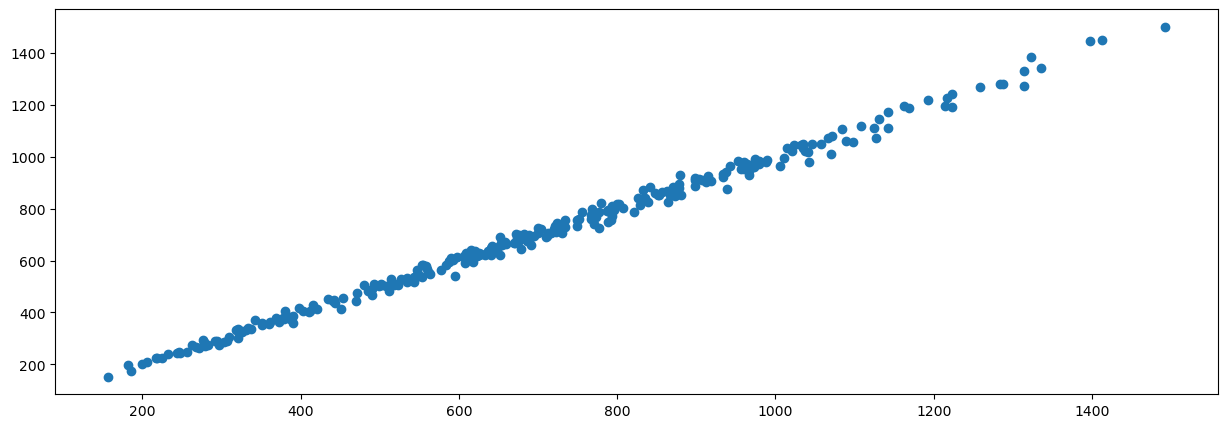

In [36]:
predict=model.predict(Train)
plt.scatter(predict,TrainLabel)

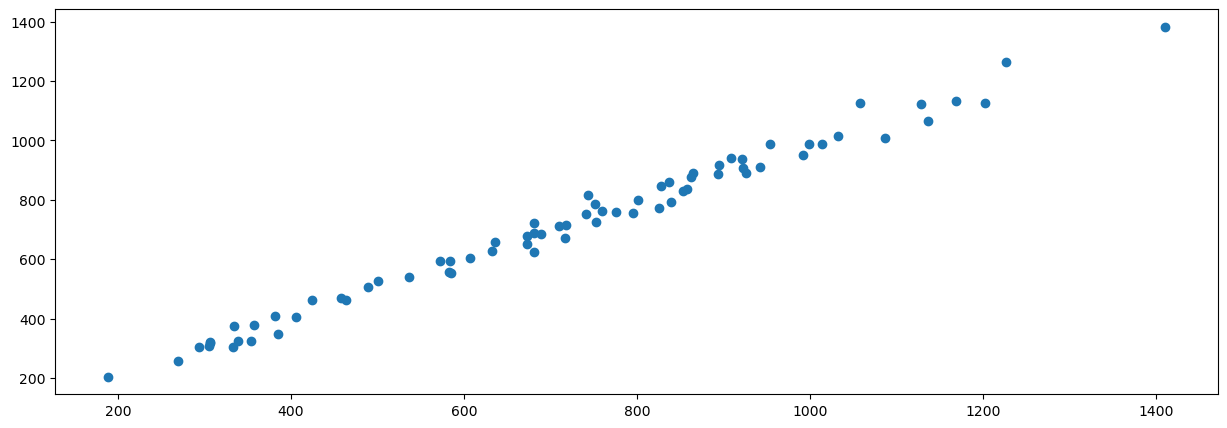

In [37]:
predictt=model.predict(Test)
plt.scatter(predictt,TestLabel)

In [38]:
score(TrainLabel,predict)

(357.60807022999586, 18.91052802620794, 2.1497474, 0.9953422355195771)

In [39]:
score(TestLabel,predictt)

(977.2656318373306, 31.2612480850866, 3.7383108, 0.9859590679373839)

In [136]:
Train.shape

(288, 10)

In [139]:
L1, L2 = [], []

Lyr = [50, 100, 200, 500, 800, 1000, 2000, 3000, 5000]
batch = [16, 32, 64, 128, 512, 1024]
act = ['relu', 'sigmoid', 'tanh']
minum = 100

for x in Lyr:
    for y in Lyr:
        if y<=x:
            continue
        for a in act:
            for b in batch:
                
                reset_random_seeds(seed)

                input_lyr = Input(shape=(top,))
                initializer = tf.keras.initializers.HeNormal()
                layer1 = Dense(x, activation=a,kernel_initializer=initializer)(input_lyr)
                layer2 = Dense(y, activation=a,kernel_initializer=initializer)(layer1)
                # layer3 = Dense(5000, activation='relu',kernel_initializer=initializer)(layer2)
                # d11=Dropout(0.01)(layer3)
                output_layer = Dense(1)(layer2)
                model = Model(input_lyr, output_layer)

                model.compile(optimizer='adam', loss='mse')
                # model.summary()

                reset_random_seeds(seed)

                callback=keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1.0e-4, patience=100, verbose=0, mode="auto", baseline=None, restore_best_weights=True)
                history = model.fit(Train, TrainLabel, epochs=50000, batch_size=b,  validation_data=(Test, TestLabel), callbacks=[callback], shuffle=True, verbose=0)

                predict=model.predict(Train, verbose=0)

                predictt=model.predict(Test, verbose=0)

                A1,A2, A3, A4 = score(TrainLabel,predict)
                B1,B2, B3, B4 = score(TestLabel,predictt)

                L1.append([x,y,a,b,A2,B2])
                print('Current: ', end='')
                print(L1[-1])
                if L1[-1][-2]<minum:
                    minum=L1[-1][-2]
                    L2=L1[-1]
                print('Minimum: ', end='')
                print(L2)
                
                

3/3 [==============================] - 0s 6ms/step
[50, 100, 'relu', 16, 32.62820228039043, 33.703233295411664]
3/3 [==============================] - 0s 6ms/step
[50, 100, 'relu', 32, 28.521974757344235, 32.588165786563756]
3/3 [==============================] - 0s 6ms/step
[50, 100, 'relu', 64, 29.962629957264422, 32.461826534887486]
3/3 [==============================] - 0s 6ms/step
[50, 100, 'relu', 128, 34.02647636266122, 33.13550626792068]
3/3 [==============================] - 0s 7ms/step
[50, 100, 'relu', 512, 24.773390123665756, 34.487294077244535]
3/3 [==============================] - 0s 7ms/step
[50, 100, 'relu', 1024, 24.773390123665756, 34.487294077244535]
3/3 [==============================] - 0s 7ms/step
[50, 100, 'sigmoid', 16, 20.581461017321995, 26.813265479536213]
3/3 [==============================] - 0s 6ms/step
[50, 100, 'sigmoid', 32, 18.85801051845714, 26.408268699396277]
3/3 [==============================] - 0s 6ms/step
[50, 100, 'sigmoid', 64, 20.13756081275

3/3 [==============================] - 0s 9ms/step
[50, 500, 'tanh', 64, 9.637916933327668, 28.344929455354897]
3/3 [==============================] - 0s 9ms/step
[50, 500, 'tanh', 128, 9.169787392092472, 27.41485233640778]
3/3 [==============================] - 0s 8ms/step
[50, 500, 'tanh', 512, 37.898064918000756, 42.98786130691481]
3/3 [==============================] - 0s 11ms/step
[50, 500, 'tanh', 1024, 37.898064918000756, 42.98786130691481]
3/3 [==============================] - 0s 9ms/step
[50, 800, 'relu', 16, 20.72391722053679, 31.74270397458236]
3/3 [==============================] - 0s 8ms/step
[50, 800, 'relu', 32, 21.927846785316707, 32.24772726816773]
3/3 [==============================] - 0s 6ms/step
[50, 800, 'relu', 64, 23.396095850142565, 33.227540884803474]
3/3 [==============================] - 0s 10ms/step
[50, 800, 'relu', 128, 32.3260121848923, 34.963227065136785]
3/3 [==============================] - 0s 8ms/step
[50, 800, 'relu', 512, 20.883581640784612, 34.64

3/3 [==============================] - 0s 10ms/step
[100, 200, 'relu', 1024, 28.99307592541617, 36.24344100488305]
3/3 [==============================] - 0s 15ms/step
[100, 200, 'sigmoid', 16, 14.39162995297076, 25.25664552660247]
3/3 [==============================] - 0s 11ms/step
[100, 200, 'sigmoid', 32, 14.61210782454516, 24.26366939668089]
3/3 [==============================] - 0s 13ms/step
[100, 200, 'sigmoid', 64, 20.424011851544904, 27.348207810431404]
3/3 [==============================] - 0s 11ms/step
[100, 200, 'sigmoid', 128, 21.612981480917327, 27.47811568591357]
3/3 [==============================] - 0s 12ms/step
[100, 200, 'sigmoid', 512, 15.9579338811031, 29.724787195430178]
3/3 [==============================] - 0s 14ms/step
[100, 200, 'sigmoid', 1024, 15.9579338811031, 29.724787195430178]
3/3 [==============================] - 0s 11ms/step
[100, 200, 'tanh', 16, 10.030269455012071, 27.492110849596664]
3/3 [==============================] - 0s 14ms/step
[100, 200, 'tan

3/3 [==============================] - 0s 18ms/step
[100, 3000, 'tanh', 32, 6.772128919697343, 24.829683722396858]
3/3 [==============================] - 0s 9ms/step
[100, 3000, 'tanh', 64, 7.37725048532527, 25.343162366739975]
3/3 [==============================] - 0s 13ms/step
[100, 3000, 'tanh', 128, 14.711462888025586, 25.796469498467378]
3/3 [==============================] - 0s 15ms/step
[100, 3000, 'tanh', 512, 6.234334056754035, 26.485140873647676]
3/3 [==============================] - 0s 26ms/step
[100, 3000, 'tanh', 1024, 6.234334056754035, 26.485140873647676]
3/3 [==============================] - 0s 19ms/step
[100, 5000, 'relu', 16, 7.837896878690044, 27.582218460831974]
3/3 [==============================] - 0s 16ms/step
[100, 5000, 'relu', 32, 10.24410513302745, 26.761538770382046]
3/3 [==============================] - 0s 15ms/step
[100, 5000, 'relu', 64, 12.47103303919113, 28.577870745947646]
3/3 [==============================] - 0s 22ms/step
[100, 5000, 'relu', 128, 

3/3 [==============================] - 0s 11ms/step
[200, 3000, 'relu', 128, 23.42802419775279, 29.96225136354051]
3/3 [==============================] - 0s 17ms/step
[200, 3000, 'relu', 512, 20.2772001014248, 32.71725726953406]
3/3 [==============================] - 0s 22ms/step
[200, 3000, 'relu', 1024, 20.2772001014248, 32.71725726953406]
3/3 [==============================] - 0s 19ms/step
[200, 3000, 'sigmoid', 16, 8.213376031672592, 22.83383985386367]
3/3 [==============================] - 0s 13ms/step
[200, 3000, 'sigmoid', 32, 29.27567739785906, 31.35922962706973]
3/3 [==============================] - 0s 14ms/step
[200, 3000, 'sigmoid', 64, 15.668619400493922, 24.93466622140226]
3/3 [==============================] - 0s 18ms/step
[200, 3000, 'sigmoid', 128, 31.74106056115053, 33.95280766134243]
3/3 [==============================] - 0s 16ms/step
[200, 3000, 'sigmoid', 512, 6.32321632969659, 26.182622348229167]
3/3 [==============================] - 0s 11ms/step
[200, 3000, 'sig

3/3 [==============================] - 0s 16ms/step
[500, 800, 'tanh', 512, 26.33001345231908, 37.096426209649096]
3/3 [==============================] - 0s 18ms/step
[500, 800, 'tanh', 1024, 26.33001345231908, 37.096426209649096]
3/3 [==============================] - 0s 15ms/step
[500, 1000, 'relu', 16, 13.119331058420604, 25.895397396799925]
3/3 [==============================] - 0s 16ms/step
[500, 1000, 'relu', 32, 18.106652764811795, 28.56332300319848]
3/3 [==============================] - 0s 15ms/step
[500, 1000, 'relu', 64, 19.258377369842087, 29.104844300858897]
3/3 [==============================] - 0s 18ms/step
[500, 1000, 'relu', 128, 22.98877044657289, 30.9737118456773]
3/3 [==============================] - 0s 17ms/step
[500, 1000, 'relu', 512, 29.017766580562245, 31.63674753144166]
3/3 [==============================] - 0s 16ms/step
[500, 1000, 'relu', 1024, 29.017766580562245, 31.63674753144166]
3/3 [==============================] - 0s 16ms/step
[500, 1000, 'sigmoid', 

3/3 [==============================] - 0s 19ms/step
[500, 3000, 'sigmoid', 1024, 4.604806310199538, 24.600071201635895]
3/3 [==============================] - 0s 16ms/step
[500, 3000, 'tanh', 16, 6.918643179266808, 29.120166798115452]
3/3 [==============================] - 0s 18ms/step
[500, 3000, 'tanh', 32, 7.817655278422121, 31.097265856431957]
3/3 [==============================] - 0s 17ms/step
[500, 3000, 'tanh', 64, 12.195294773796745, 32.17463570923938]
3/3 [==============================] - 0s 18ms/step
[500, 3000, 'tanh', 128, 11.207854914511419, 32.95478071323839]
3/3 [==============================] - 0s 14ms/step
[500, 3000, 'tanh', 512, 12.79342077352646, 33.245409800126744]
3/3 [==============================] - 0s 12ms/step
[500, 3000, 'tanh', 1024, 12.79342077352646, 33.245409800126744]
3/3 [==============================] - 0s 16ms/step
[500, 5000, 'relu', 16, 10.304136210056225, 25.310285322223525]
3/3 [==============================] - 0s 15ms/step
[500, 5000, 'relu'

3/3 [==============================] - 0s 77ms/step
[800, 2000, 'sigmoid', 16, 7.6324005437860905, 23.476555122218848]
3/3 [==============================] - 0s 38ms/step
[800, 2000, 'sigmoid', 32, 11.796252964919343, 24.287387785288637]
3/3 [==============================] - 0s 22ms/step
[800, 2000, 'sigmoid', 64, 11.89164554172636, 25.265226381842727]
3/3 [==============================] - 0s 20ms/step
[800, 2000, 'sigmoid', 128, 19.28200237330189, 27.600852366428462]
3/3 [==============================] - 0s 27ms/step
[800, 2000, 'sigmoid', 512, 13.60674618428824, 30.244988897078496]
3/3 [==============================] - 0s 17ms/step
[800, 2000, 'sigmoid', 1024, 13.60674618428824, 30.244988897078496]
3/3 [==============================] - 0s 63ms/step
[800, 2000, 'tanh', 16, 9.022059419494209, 31.211729984583716]
3/3 [==============================] - 0s 26ms/step
[800, 2000, 'tanh', 32, 17.998366455837512, 34.46910918752894]
3/3 [==============================] - 0s 28ms/step
[800

3/3 [==============================] - 0s 16ms/step
[1000, 2000, 'relu', 32, 12.453807506483814, 26.42649547934519]
3/3 [==============================] - 0s 17ms/step
[1000, 2000, 'relu', 64, 8.411231970102458, 25.663812939964405]
3/3 [==============================] - 0s 14ms/step
[1000, 2000, 'relu', 128, 11.190523037396504, 27.28205711829635]
3/3 [==============================] - 0s 14ms/step
[1000, 2000, 'relu', 512, 5.661973571062518, 26.1985241462983]
3/3 [==============================] - 0s 20ms/step
[1000, 2000, 'relu', 1024, 5.661973571062518, 26.1985241462983]
3/3 [==============================] - 0s 20ms/step
[1000, 2000, 'sigmoid', 16, 6.965500738454468, 25.4363711533258]
3/3 [==============================] - 0s 22ms/step
[1000, 2000, 'sigmoid', 32, 8.14588056160388, 24.716649847927524]
3/3 [==============================] - 0s 16ms/step
[1000, 2000, 'sigmoid', 64, 9.611740575851506, 26.060922449947707]
3/3 [==============================] - 0s 29ms/step
[1000, 2000, '

3/3 [==============================] - 0s 33ms/step
[3000, 5000, 'sigmoid', 64, 10.023938674399067, 29.539386457933592]
3/3 [==============================] - 0s 16ms/step
[3000, 5000, 'sigmoid', 128, 25.73870020941037, 34.818116403984696]
3/3 [==============================] - 0s 25ms/step
[3000, 5000, 'sigmoid', 512, 9.551610838680476, 31.346541470957508]
3/3 [==============================] - 0s 30ms/step
[3000, 5000, 'sigmoid', 1024, 9.551610838680476, 31.346541470957508]
3/3 [==============================] - 0s 16ms/step
[3000, 5000, 'tanh', 16, 21.638692113748515, 28.906404735361175]
3/3 [==============================] - 0s 24ms/step
[3000, 5000, 'tanh', 32, 14.08118053326991, 33.8842263466844]
3/3 [==============================] - 0s 16ms/step
[3000, 5000, 'tanh', 64, 24.641079500516877, 36.809473632541774]
3/3 [==============================] - 0s 23ms/step
[3000, 5000, 'tanh', 128, 13.226935234120669, 35.007129708393315]
3/3 [==============================] - 0s 44ms/step
[

In [ ]:
100	3000	 'relu'	512	2.798679184	 25.106000666581686]